In [15]:
%matplotlib inline
"""HUN7,PSC"""

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

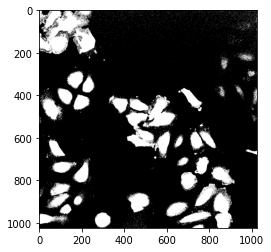

In [16]:
gray = cv.imread('ctc_raw_data/train/Fluo-C2DL-Huh7/02/t000.tif', cv.IMREAD_UNCHANGED)
img = cv.imread('ctc_raw_data/train/Fluo-C2DL-Huh7/02/t000.tif')
ret, thresh = cv.threshold(gray, 20, 255, cv.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

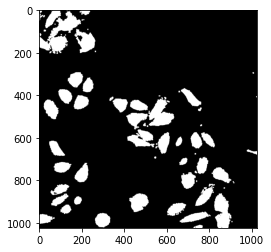

In [17]:
# noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=2)
plt.imshow(opening, cmap='gray')

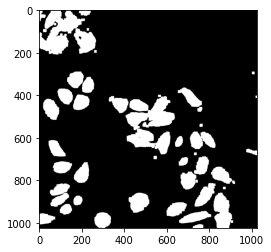

In [23]:
# sure background area
sure_bg = cv.dilate(opening, kernel, iterations=3)
plt.imshow(sure_bg, cmap='gray')

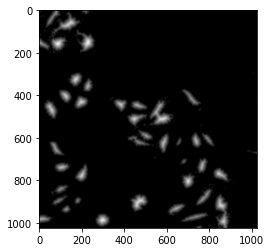

In [18]:
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening, cv.DIST_L2, 5)
plt.imshow(dist_transform, cmap='gray')

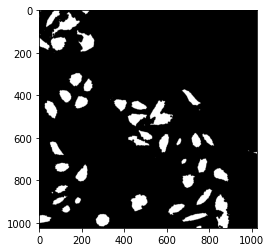

In [31]:
ret, sure_fg = cv.threshold(dist_transform, 0.15 * dist_transform.max(), 255, 0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
plt.imshow(sure_fg, cmap='gray')

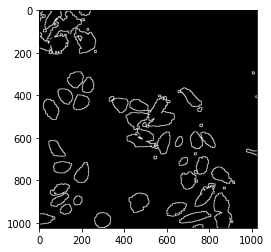

In [24]:
unknown = cv.subtract(sure_bg, sure_fg)
plt.imshow(unknown, cmap='gray')

True

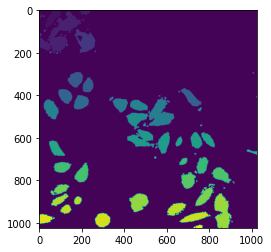

In [25]:
# Marker labelling
retval, markers, stats, centroids = cv.connectedComponentsWithStats(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers += 1
# Now, mark the region of unknown with zero
markers[unknown == 255] = 0
plt.imshow(markers)
cv.imwrite('test.tif', markers)

In [25]:
markers = cv.watershed(img, markers)
img[markers == -1] = [255, 0, 0]
plt.imsave('test.png', markers)